In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))
import functions_ml as fml
import pandas as pd
%load_ext autoreload
%autoreload 2

# Análise nova

In [88]:
limits = [0, 0.010/100, 0.020/100, 0.030/100, 0.040/100, 0.050/100, 0.060/100, 0.070/100, 0.080/100, 0.090/100, 0.1/100, 0.5/100, 1/100]#, 2/100, 3/100, 4/100, 5/100]
# limits = [0, 0.01/100, 0.05/100, 0.1/100, 0.5/100, 1/100, 5/100]

In [89]:
# 1. Get dataset
results = pd.read_csv('../datasets/instances_results.csv')
features = pd.read_csv('../datasets/multi_plant_instance_features.csv')
dataset = fml.create_dataset(features, results)
methods = [col[4:] for col in results.columns if col.startswith('Obj')]

In [90]:
# Initialize an empty DataFrame
summary_table = pd.DataFrame(columns=limits, index=methods)

# Populate the table
for l in limits:
    dataset_targets = fml.create_multi_label_target(dataset, l)[methods]
    for m in methods:
        method_sum = dataset_targets[m].sum()
        summary_table.at[m, l] = method_sum

# Convert the summary table to integers (optional)
summary_table = summary_table.astype(int)

# Display the table
summary_table

,0.0000,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.0010,0.0050,0.0100
RF_1_0,47,51,72,106,137,160,184,203,212,224,232,335,386
RF_2_0,50,99,146,190,224,244,257,274,283,291,295,393,443
RF_2_1,29,93,149,197,219,239,248,256,261,269,275,378,409
RF_3_0,30,122,174,211,232,248,251,256,269,280,284,383,427
RF_3_1,40,125,198,226,243,255,264,272,281,290,298,382,427
RF_3_2,32,119,183,204,215,228,243,250,252,257,265,366,400
RF_4_0,21,123,191,220,233,246,252,260,265,273,280,384,413
RF_4_1,36,162,224,248,267,275,280,282,292,300,312,407,454
RF_4_2,52,168,222,241,251,258,263,271,279,287,291,413,433
RF_4_3,41,166,212,231,237,243,250,251,253,253,255,366,383


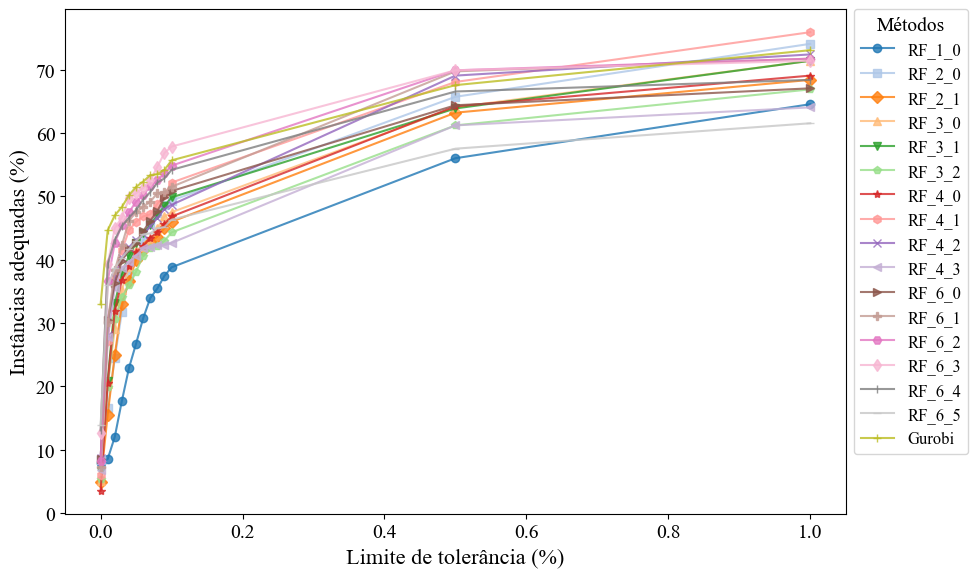

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap and markers
colors = plt.cm.tab20.colors  # Use a colormap with enough colors
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', 'x', '<', '>', 'P', 'H', 'd', '|', '_', '+']  # 17 markers

# Normalize the table values relative to 598
normalized_table = (summary_table / 598) * 100
normalized_table.rename(index={"RF_T_0": "Gurobi"}, inplace=True)

# Configure the font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Create the plot
plt.figure(figsize=(10, 6))
for i, method in enumerate(normalized_table.index):
    plt.plot(
        normalized_table.columns * 100,  # Convert x-axis to percentage
        normalized_table.loc[method],
        label=method,
        alpha=0.8,
        color=colors[i % len(colors)],  # Cycle through colors
        marker=markers[i % len(markers)],
        linestyle='-'  # Solid line
    )

# Customize the plot
plt.xlabel('Limite de tolerância (%)', fontsize=16)
plt.ylabel('Instâncias adequadas (%)', fontsize=16)
plt.legend(
    title='Métodos',
    fontsize=12,
    title_fontsize=14,
    loc='upper left',  # Position the legend
    bbox_to_anchor=(1, 1.017)  # Move legend outside the plot
)
plt.tight_layout()

# Remove the grid
# plt.grid(True)
plt.tight_layout()
plt.savefig('fig_resultados_tolerancia.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Análise velha

In [ ]:
# Load your data
results = pd.read_csv('../datasets/instances_results.csv')
features = pd.read_csv('../datasets/multi_plant_instance_features.csv')

# Initialize an empty DataFrame to store the value counts for each limit
final_df = pd.DataFrame()

# List of limits to test
limits = [0, 0.01/100, 0.05/100, 0.1/100, 0.5/100, 1/100, 5/100]

for limit in limits:
    dataset = fml.create_dataset(dataset_features=features, dataset_results=results)
    dataset = fml.create_binary_target(data=dataset, tolerance=limit)

    # Count the target values
    value_counts = dataset['TARGET'].value_counts().sort_index()

    # Add the counts to the final DataFrame
    final_df[f'Limit_{limit}'] = value_counts

# Fill NaN values with 0 if any method does not appear in some limit configurations
final_df.fillna(0, inplace=True)

# Save or display the final DataFrame
final_df = final_df.reset_index()
final_df.columns = ['Method', '0', '0,01%', '0,05%', '0,1%', '0,5%', '1%', '5%']
final_df.loc[final_df['Method'] == 'RF_T_0', 'Method'] = 'Gurobi'
final_df.to_csv('resultados_alvo.csv', index=False)
final_df

,Method,0,"0,01%","0,05%","0,1%","0,5%",1%,5%
0,GroupA,210,307,391,419,481,531,554
1,GroupB,388,291,207,179,117,67,44


In [3]:
final_df = final_df.set_index('Method')

# Generalize the index for grouping
final_df.index = final_df.index.str.replace(r'_\d+$', '_X', regex=True)

# Group by the new index and sum the groups
grouped_df = final_df.groupby(final_df.index).sum()

# This will sum all 'RF_6_X' into 'RF_6', 'RF_4_X' into 'RF_4', etc.
grouped_df

,0,"0,01%","0,05%","0,1%","0,5%",1%,5%
Method,,,,,,,
Gurobi,144,46,33,26,13.0,13.0,14.0
RF_1_X,47,51,125,174,241.0,270.0,364.0
RF_2_X,79,129,168,164,165.0,180.0,138.0
RF_3_X,82,115,86,79,85.0,78.0,42.0
RF_4_X,94,117,99,73,53.0,31.0,14.0
RF_6_X,152,140,87,82,41.0,26.0,26.0


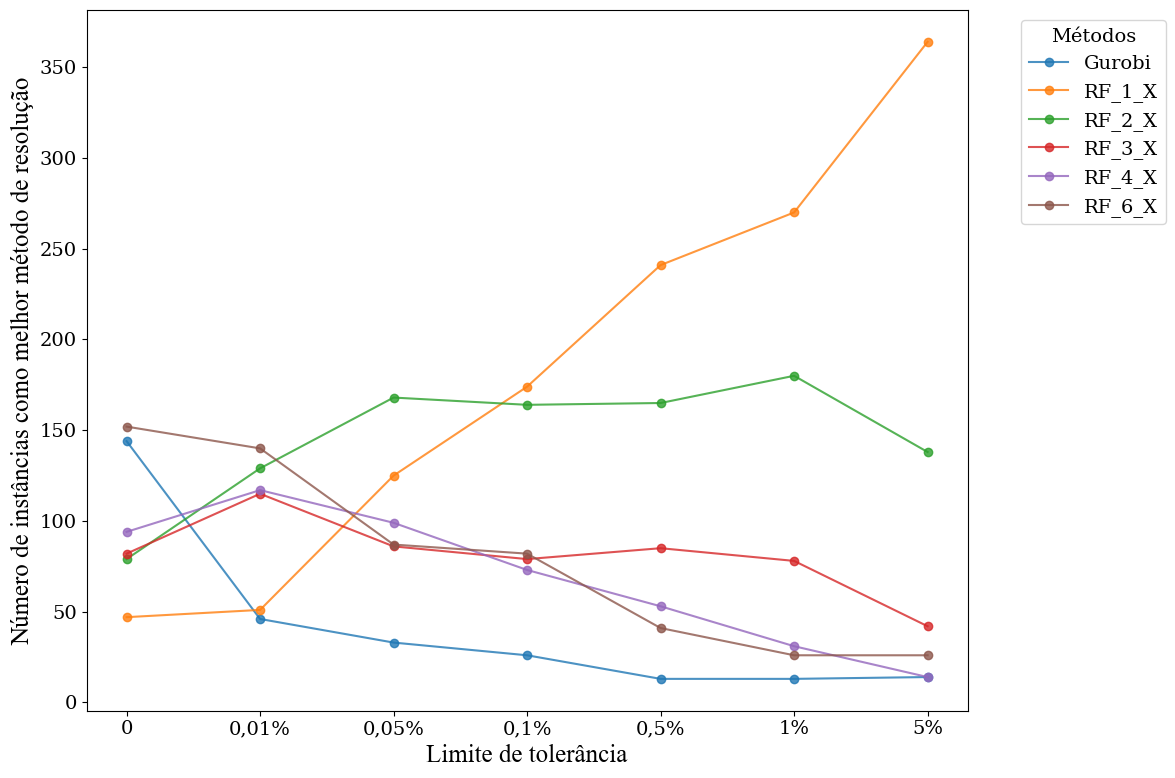

In [4]:
import matplotlib.pyplot as plt

# plot_df = final_df[final_df.index.isin(['Gurobi']) | final_df.index.str.match(r'RF_\d_0')]
plot_df = grouped_df

# Ensure column names (tolerance limits) are unique and correctly ordered
columns_ordered = ['0', '0,01%', '0,05%', '0,1%', '0,5%', '1%', '5%']

plt.rcParams['font.family'] = 'serif'  # Set the font family to 'serif', you can change it to 'Arial', 'Times New Roman', etc.
plt.rcParams['font.size'] = 14  # Set the global font size

# Plotting the data with correct alignment and unique tolerance limits
plt.figure(figsize=(12, 8))
for method in plot_df.index:
    # Select the columns in the defined order, avoiding any misalignment
    plt.plot(columns_ordered, plot_df.loc[method, columns_ordered], marker='o', label=method, alpha=0.8)

# plt.title('Escolha de métodos para diferentes limites de tolerância')
plt.xlabel('Limite de tolerância', fontsize=18, fontname='Times New Roman')
plt.ylabel('Número de instâncias como melhor método de resolução', fontsize=18, fontname='Times New Roman')
plt.xticks(rotation=0)  # Ensures the labels are readable
plt.legend(title='Métodos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.savefig('fig_resultados_tolerancia.png', dpi=300, bbox_inches='tight')
plt.show()